# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [170]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

**Answer:**
The first PCA dimension might show a vector with a high absolute value for fresh and milk, because selling milk usually goes together with selling fresh produce. Another possibility for first PCA dimension is a vector with high absolute value for grocery, frozen and detergents paper because those category fits into convenience store that does not sell fresh produce.

ICA dimension vector might show a linear combination of fresh and milk to form the first source (latent variable), or a combination of grocery, frozen and detergents paper to form the second source. For example: 
```
s1 = 2*fresh + 1*milk
s2 = grocery + frozen + 2*detergents

# in vector
s1 = [2, 1, 0, 0, 0, 0]
s2 = [0, 0, 1, 1, 2, 0]
```


### PCA

In [171]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

**Answer:** Looking at the explained variance ratio, after the first 2 primary components, the variance drop off significantly. Based on this result, I would choose 2 dimensions for analysis, because the remaining dimensions' variance is small enough that there would be little information lost by removing them.

**3)** What do the dimensions seem to represent? How can you use this information?

**Answer:** 
The 1st primary component is a vector with a lot of weight on the Fresh category (-0.98), followed by Frozen (-0.15) and Milk (-0.12). Because frozen and milk value is relatively small compare to the fresh category, this component seem to be driven mostly by the fresh category, and it accounts for most of the variance in the data. 
The 2nd primary component is a vector with the biggest value on Grocery (0.76), Milk (0.52) and Detergents paper (0.37). This indicates that there is a pretty strong correlation between Grocery, Milk and Detergents paper. The combination of these 3 features made up most of the remaining variance of the data.

We can use this information to see what original features contribute to most of the variance in the data. These 2 principal components--that is a mix of fresh, and (grocery, milk, and detergents paper)--account for most of the variance in the data. So we can use these 2 principal components as new features and project the data to reduce the number of features to analyze while still retaining most of the information from the original data. Reducing features will be useful in making calculation simpler and faster. 


### ICA

In [122]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

ica = FastICA(n_components=6)

# mean = data.mean()
# print "mean from original data: "
# print mean
print data[0:1]

data_centered = preprocessing.scale(data)
# print "data centered around origin:"
# print data_centered[0:5]

ica.fit(data_centered)

# Print the independent components
# Note: rounded down to 3 decimal places for more readability
rounded_ica_components = ica.components_.round(2)
print "ICA components rounded down to 2 decimal places"
print rounded_ica_components

print "ICA components after recentering (so there are no negative values)"
recentered_ica_components = rounded_ica_components - rounded_ica_components.min()
print recentered_ica_components
# print normalized_ica_components[0].sum()
# print normalized_ica_components.sum(axis=1)

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
ICA components rounded down to 2 decimal places
[[ 0.    0.07 -0.06 -0.    0.02 -0.02]
 [-0.    0.02  0.11 -0.01 -0.13 -0.02]
 [-0.    0.01 -0.07 -0.    0.02  0.01]
 [ 0.    0.    0.01  0.   -0.   -0.05]
 [-0.05  0.01  0.01  0.   -0.01  0.  ]
 [ 0.01  0.   -0.01 -0.05  0.    0.02]]
ICA components after recentering (so there are no negative values)
[[ 0.13  0.2   0.07  0.13  0.15  0.11]
 [ 0.13  0.15  0.24  0.12  0.    0.11]
 [ 0.13  0.14  0.06  0.13  0.15  0.14]
 [ 0.13  0.13  0.14  0.13  0.13  0.08]
 [ 0.08  0.14  0.14  0.13  0.12  0.13]
 [ 0.14  0.13  0.12  0.08  0.13  0.15]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

**Answer:**

Each vector in the ICA decomposition represent some latent variables (sources) that is composed of linear combination of the observed features (fresh, milk, groceries, etc). 

```
     Fresh  Milk  Groc  Froz  Det   Deli
1st [ 0.13  0.2   0.07  0.13  0.15  0.11]
2nd [ 0.13  0.15  0.24  0.12  0.    0.11]
3rd [ 0.13  0.14  0.06  0.13  0.15  0.14]
4th [ 0.13  0.13  0.14  0.13  0.13  0.08]
5th [ 0.08  0.14  0.14  0.13  0.12  0.13]
6th [ 0.14  0.13  0.12  0.08  0.13  0.15]
```

The 1st ICA component represent an independent source that is relatively composed of:
```
0.13 Fresh + 0.2 Milk + 0.07 Grocery + 0.13 Frozen + 0.15 Detergents paper + 0.11 Delicatessen
```

ICA can be used to transforms the data about spending on the observed categories, such as Fresh, Milk, etc, into spending on, maybe, certain type of products that our customer buy depending on the type of customer. For example, looking at the first ICA, maybe it's a category of product that is used by a deli shop like fresh vegtables, meat, milk, a little grocery (for spices, salt), detergents for washing dishes and paper towel for kitchen and bathroom.    

In the same way, the 2nd ICA component represent a source that is relatively composed of:
```
0.13 Fresh + 0.15 Milk + 0.24 Grocery + 0.12 Frozen + 0.0 Detergents paper + 0.11 Delicatessen
```

This might represent category of product that is bought by stores that only sell food (very little detergents paper spending).

3rd ICA component: 
```
0.13 Fresh + 0.14 Milk + 0.06 Grocery + 0.13 Frozen + 0.15 Detergents paper + 0.14 Delicatessen
```

This is very similar to the 1st ICA component, with milk and deli swapping some weight.

4th ICA component: 
```
0.13 Fresh + 0.13 Milk + 0.14 Grocery + 0.13 Frozen + 0.13 Detergents paper + 0.08 Delicatessen
```

This seem to represent a category of product that spans all original categories equally, except delicatessen. It might be the type of products purchased by a big grocery store that does not have deli section (or a small deli section). 

And so on for n-th component. 

It should be noted that the result from running ICA is always different every time (unstable), making interpretation of this result hard, and probably not very useful, as ICA doesn't seem to be able to find a consistent independent components that underlie the data. 


## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
K Means is simple and fast clustering algorithm for large data set. However it does not always produce a consistent result (its result can be significantly different depending on the initialization state). It also performs poorly when there is significant density difference between the clusters, because the dense cluster pulls the center of less dense cluster (http://varianceexplained.org/r/kmeans-free-lunch/).

Gaussian Mixture Models has the advantage of having a soft classification feature, meaning that there can be grey area where the algortihm predicts some points as having close to 50/50 chance of being in one cluster or another. It uses probabilistic approcah so we can inquire the probability of a data point being in one cluster. 

For this purpose, even though both KMeans and GMM produce similar result and is fast enough for the data set, I chose GMM because it seems to fit the data better visually. 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [172]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [189]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
pca.fit(data)
reduced_data = pca.transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [238]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

use_kmeans = False
if use_kmeans:
    clusters = KMeans(n_clusters=3)
else:
    clusters = GMM(n_components=3, covariance_type='full')
clusters.fit(reduced_data)
print clusters

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [239]:
# Plot the decision boundary by building a mesh grid to populate a graph.
# print type(reduced_data)
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [240]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

if use_kmeans:
    centroids = clusters.cluster_centers_
else:
    centroids = clusters.means_
print centroids

[[-16124.38278841  -5074.17173035]
 [  4460.37052071  -3349.57116377]
 [  1718.61432297  19219.30845756]]


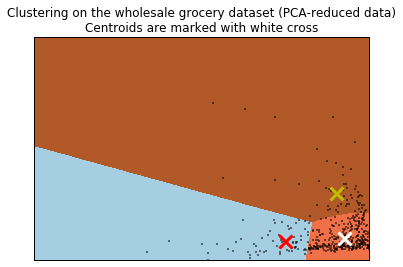

In [241]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
centroid_colors = ['r', 'w', 'y']
for i in range(0, 3):
    plt.scatter(centroids[i, 0], centroids[i, 1],
                marker='x', s=169, linewidths=3,
                color=centroid_colors[i], zorder=10)

plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

**Answer:**

The first cluster--which takes the lower left corner--is a group of customers that buys some fresh product and less grocery, milk, and detergents paper. These seems to be smaller family owned shops selling mostly fresh product.

The second cluster--which spans upper left to upper right corner--is a group of customers that buys more grocery, milk and detergents paper as well as fresh products. This group seems to be the larger grocery store like Safeway, or Kroger. There are less of these customers (maybe around 10%-15% of all customers), but their total purchase makes up a bigger proportion of the company revenue. 

The third cluster--which takes a small area on the lower right corner and accounts for majority of the customers and probably the majority of the company revenue--is a group of customers that buys more fresh product and less grocery, milk, and detergents paper. This group seems to be similar to the first group, but buys more fresh product. This 1st and 3rd group could be a store selling fresh product or a deli shop selling fresh food, sadwiches, etc.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

**Answer:**

I feel PCA gave us the most insight into the data. First, it tells us that 95% of the variance in the data is accounted by the first 2 principal components. It also tells us that the first principal component accounts for  variance in fresh product, while the 2nd principal components accounts for variance in grocery, milk, and detergents paper. We also use PCA to reduce the data to 2 dimensions by projecting the data to the first 2 principal components. Having the data in 2 dimensions allows us to visualize the customer segments. 

**9)** How would you use that technique to help the company design new experiments?

**Answer:**

We can use PCA and clusering method to divide the customers into 2 or 3 segments. When the company designs new experiments, they could conduct A/B testing where the new experiment is implemented for half of the customers in each segments, while the other half continue without the new experiment. For each customer segment we measure the customer satisfaction or increase in revenue (order) and compare the result with the baseline group (without new new experiment). This way we can see if a change affects a customer segment positively or negatively. 

**10)** How would you use that data to help you predict future customer needs?

**Answer:**

We could use the data to label our existing customers into roughly 2 segments: smaller businesses buying mostly fresh product (which is the majority of the company's customer), and bigger stores buying fresh product, grocery, detergents paper, etc. We can implement a supervised learning model and train it using this existing data to predict which customer segment a new customer will fall into (after we have their purchasing data).

If we have a history of purchasing data (possbily broken down to months). We can analyze the purchasing pattern for each customer segment and create a regression model to predict how much a certain customer will spend in the next month, and what kind of product they will purchase, so the company can prepare for how much stock to keep in their warehouse. 
 